In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from scipy import ndimage
import pylab as pl
from matplotlib import collections  as mc
import time


steps: 

1- load all landmarks (smallt,middlet,bigt,square,parall,parall_rev)

2- limit the rotations of square and parall

3- read image

4- for each ldm extract possible positions
    match the position with the data

5- update the imaginal


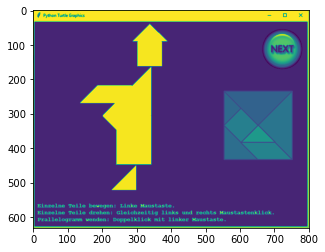

In [53]:
img = cv.imread('./example_pictures/1.png',0)
plt.imshow(img)

(600, 800)

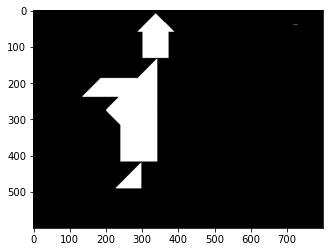

In [54]:
img = cv.imread('./example_pictures/1.png',0)
trhesh,img = cv.threshold(img, 240,1, cv.THRESH_BINARY)
img = img[31:-1,1:-1]
img[500:,:] = 0
plt.imshow(img*255,cmap = 'gray')
img.shape

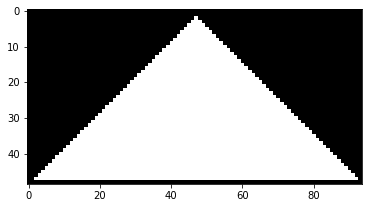

In [65]:
##templates
name = 'bigt'
template = cv.imread(f"./tans/{name}.png",0)
t2,template = cv.threshold(template, 100,1, cv.THRESH_BINARY)
plt.imshow(template*255,cmap='gray')

nonzero = template.nonzero()
small_t_templates = [template[min(nonzero[0]) - 2:max(nonzero[0]) + 2, min(nonzero[1]) - 2:max(nonzero[1]) + 2]]
for r in range(-45,-325,-45):
    rotated= ndimage.rotate(template,r)
    nonzero = rotated.nonzero()
    rotated= rotated[min(nonzero[0])-2:max(nonzero[0])+2,min(nonzero[1])-2:max(nonzero[1])+2]
    small_t_templates.append(rotated)
plt.imshow(small_t_templates[0],cmap='gray')

0.3840017318725586
[((215, 180), 0), ((467, 272), 0), ((393, 298), 0), ((31, 338), 0), ((100, 341), 45), ((385, 310), 45), ((220, 310), 45), ((451, 266), 135), ((99, 341), 135), ((384, 310), 135), ((165, 310), 135), ((99, 342), 225), ((384, 311), 225), ((384, 274), 225), ((178, 319), 270), ((464, 275), 270), ((372, 319), 270), ((226, 319), 270)]


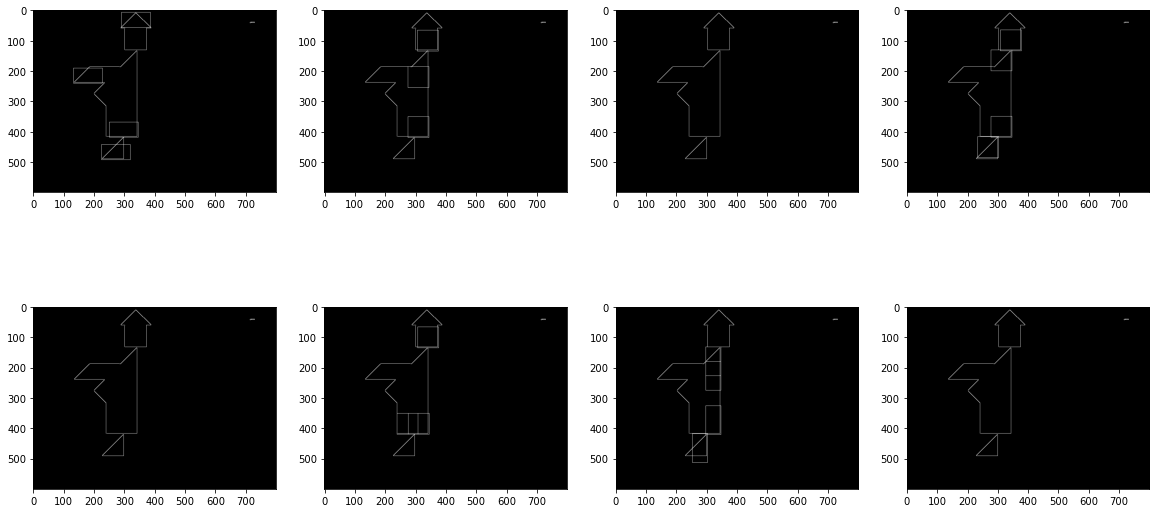

In [66]:
fig,axs = plt.subplots(2,4)
fig.set_figheight(10)
fig.set_figwidth(20)
available_placements =[]
start = time.time()
for ti,ax in zip(range(len(small_t_templates)),axs.ravel()):
#for ti in range(len(small_t_templates)):
    current = small_t_templates[ti]
    edges = cv.Canny(current*255,100,200)
    image = cv.Canny(img*255,100,200)

    h, w = current.shape[:2]

    method = cv.TM_SQDIFF



    res = cv.matchTemplate(image, edges, method, mask=  current)
    
    i=0
    attempt =0
    while i < 4 and attempt < 5:
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        xt = min_loc[1]-h//2 if min_loc[1]>20 else 0
        xb = min_loc[1]+h//2+1
        yl = min_loc[0]-w//2 if min_loc[0]>20 else 0
        yr = min_loc[0]+w//2+1
        
        res[xt:xb,yl:yr] = float('inf')
        
        central_coord = (min_loc[1]+h//2,min_loc[0]+w//2)
        if (img[central_coord] ==1):
            #print((min_loc[1]+h//2,min_loc[0]+w//2))
            cv.rectangle(image,(min_loc[0],min_loc[1]), (min_loc[0]+w+1, min_loc[1]+h+1), 255 )
            
                
            available_placements.append((central_coord,ti*45))
            i+=1
        ax.imshow(image,cmap='gray')
        attempt+=1
print(time.time()-start)
print(available_placements)

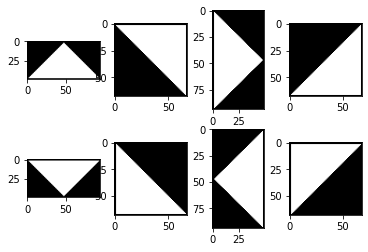

In [34]:
fig,axs = plt.subplots(2,4)
for ti,ax in zip(range(len(small_t_templates)),axs.ravel()):
    ax.imshow(small_t_templates[ti],cmap='gray')

65025.0
(305, 63)
65025.0
(274, 348)
4356675.0
(233, 60)


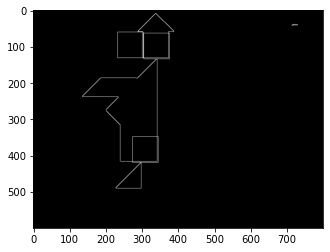

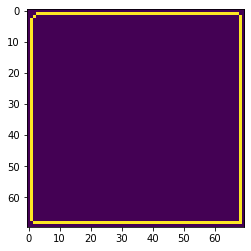

In [64]:
name = 'square'
template = cv.imread(f"./tans/{name}.png",0)
t2,template = cv.threshold(template, 100,1, cv.THRESH_BINARY)
plt.imshow(template*255,cmap='gray')

nonzero = template.nonzero()
current = template[min(nonzero[0]) - 2:max(nonzero[0]) + 2, min(nonzero[1]) - 2:max(nonzero[1]) + 2]
#current = template
edges = cv.Canny(current*255,100,200)
img = cv.imread('./example_pictures/1.png',0)
trhesh,img = cv.threshold(img, 240,1, cv.THRESH_BINARY)
img = img[31:-1,1:-1]
img[500:,:] = 0
image = cv.Canny(img*255,100,200)
#
#image =img.copy()

h, w = current.shape[:2]

method = cv.TM_SQDIFF



res = cv.matchTemplate(image, edges, method, mask=  current)
#res = cv.matchTemplate(image, current, method)
# fake out max_val for first run through loop
min_val = 1
for i in range(3):
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    print(min_val)
    print(min_loc)
         
    xt = min_loc[1]-h//2 if min_loc[1]>20 else 0
    xb = min_loc[1]+h//2+1
    yl = min_loc[0]-w//2 if min_loc[0]>20 else 0
    yr = min_loc[0]+w//2+1
    #res[max_loc[1]-h//2:max_loc[1]+h//2+1, max_loc[0]-w//2:max_loc[0]+w//2+1] = 0 
    res[xt:xb,yl:yr] = float('inf') 
    cv.rectangle(image,(min_loc[0],min_loc[1]), (min_loc[0]+w+1, min_loc[1]+h+1), 255 )
        

plt.figure(0)
plt.imshow(image,cmap='gray')
plt.figure(1)
plt.imshow(edges)